# Problem Statement 

Best Media is currently experiencing a decline in subscription and renewal rates. To address this, the product manager proposes implementing a free 7-day trial of the premium package to attract users and boost subscriptions. He believes that by offering this free trial, users will have an insight on the features of the premium package and thus start buying and renewing their package Best media’s data team, consisting of data analysts and scientists, has been tasked with assessing the feasibility and effectiveness of this approach.

Statistical framework    
Alpa: 0.05,
Statistical power: 0.8,
MDE: 1%,
Success matrix: Subscription renewal rate (no of sub_renewal / no of users),
Target population: Active users, 
Duration of Experiment: 21 days,
Sample size: 10,000 from each group,
Control group: No free trial, 
Treatment group: free Trial, 


In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#now lets load in our csv file
df = pd.read_csv(r'C:\Users\agozi\Desktop\DATA\AB_test_data2.csv')

#lets print the dataset to see if it loaded correctly
print(df)

                                     User_ID                Name  \
0       f7b560dd-ca0b-4a1d-8ddf-3d0c438d6204      Heather Barber   
1       aaac1414-7e61-4720-a264-854c570f5730    Rebecca Williams   
2       9bb41cfe-8094-48f0-8cca-3ef0cdd5462f        Joseph Davis   
3       98691e09-5c40-4c79-a31b-fc049f7a7160     Anita Schroeder   
4       6de2b129-501d-4fe7-bd14-de6d9459654c     Jennifer Rivera   
...                                      ...                 ...   
499995  464f9090-810c-4222-905b-b1b10bcfcb1a  Elizabeth Martinez   
499996  f256a97e-63ab-48b1-b3a1-a2e5a2df9408        Diane Walton   
499997  421f59fb-5718-404c-8565-0172e75c1328      Kaitlyn Cooper   
499998  325d2112-1f55-4a51-94a0-d3d74bfebfcf        Leslie Davis   
499999  dbbdb191-a9c6-4d9c-8543-8d2de9f07daa       Robert George   

                user_name Subscription_Plan  subscription_upgrade  \
0               joel15950           Premium                 False   
1             andrew66275             Basic  

In [3]:
#convert the dataset to a dataframe using pandas 
df1 = pd.DataFrame(df)

#show the first ten rows of the dataset
df1.head(10)

,User_ID,Name,user_name,Subscription_Plan,subscription_upgrade,Avg_Logins_Per_Week,Gender,Time_Spent_Per_Day,Sign_Up_Year,first_time_customer,Week_since_last_sign_in,Group
0,f7b560dd-ca0b-4a1d-8ddf-3d0c438d6204,Heather Barber,joel15950,Premium,False,2,Female,1303,2020,False,31,Control
1,aaac1414-7e61-4720-a264-854c570f5730,Rebecca Williams,andrew66275,Basic,False,42,Female,379,2017,False,40,Control
2,9bb41cfe-8094-48f0-8cca-3ef0cdd5462f,Joseph Davis,ismith238,Premium,False,6,Female,699,2022,True,7,Control
3,98691e09-5c40-4c79-a31b-fc049f7a7160,Anita Schroeder,edwardward738,Basic,False,41,Male,894,2008,False,26,Control
4,6de2b129-501d-4fe7-bd14-de6d9459654c,Jennifer Rivera,nblack854,Premium,False,62,Male,1276,2010,True,43,Control
5,f0098178-e01f-4721-a54f-ade87e8a944a,Alan Rios,chasebray242,Basic,False,60,Female,43,2009,True,38,Control
6,c9fb13d3-744d-44a6-9848-811cff7bf27f,Casey Anderson,elizabethgomez243,Basic,False,36,Female,651,2019,True,14,Control
7,2ea3111d-d458-43b9-bf6c-a705a8dedef8,Madison Davis,shermanalan526,Basic,False,89,Male,1277,2012,True,33,Control
8,a911dd5b-6532-411c-bbde-4e2dd5efc507,Amanda Bailey,joshua68799,Basic,False,89,Female,414,2018,True,18,Control
9,6d1612c5-c4bd-4b09-9b7b-8d73b05c7974,William Rios,alexandervazquez458,Basic,False,11,Female,681,2010,False,7,Control


In [4]:
# lets check the distribution of the data
df1.describe()

,Avg_Logins_Per_Week,Time_Spent_Per_Day,Sign_Up_Year,Week_since_last_sign_in
count,500000.000000,500000.000000,500000.000000,500000.000000
mean,50.066718,720.449974,2013.990592,26.025708
std,29.141401,416.242578,5.470445,15.304404
min,0.000000,0.000000,2005.000000,0.000000
25%,25.000000,360.000000,2009.000000,13.000000
50%,50.000000,720.000000,2014.000000,26.000000
75%,75.000000,1082.000000,2019.000000,39.000000
max,100.000000,1440.000000,2023.000000,52.000000


In [5]:
# time to clean up the data and leave only the information i need 
# first i will start my droping all first time users, since they are not part of this test
df1 = df1.drop(df1[df1['first_time_customer'] == True].index)

#print it out
df1.head(5)

,User_ID,Name,user_name,Subscription_Plan,subscription_upgrade,Avg_Logins_Per_Week,Gender,Time_Spent_Per_Day,Sign_Up_Year,first_time_customer,Week_since_last_sign_in,Group
0,f7b560dd-ca0b-4a1d-8ddf-3d0c438d6204,Heather Barber,joel15950,Premium,False,2,Female,1303,2020,False,31,Control
1,aaac1414-7e61-4720-a264-854c570f5730,Rebecca Williams,andrew66275,Basic,False,42,Female,379,2017,False,40,Control
3,98691e09-5c40-4c79-a31b-fc049f7a7160,Anita Schroeder,edwardward738,Basic,False,41,Male,894,2008,False,26,Control
9,6d1612c5-c4bd-4b09-9b7b-8d73b05c7974,William Rios,alexandervazquez458,Basic,False,11,Female,681,2010,False,7,Control
11,f1dc5e91-20ec-49f8-8ee4-12300fc5b738,Kelly Green,benjaminmarshall864,Premium,False,79,Male,1098,2010,False,17,Control


In [9]:
# Drop rows where 'Time_Spent_Per_Day' is less than 30 mins since we are only working with active users 
df1 = df1.drop(df1[df1['Time_Spent_Per_Day'] < 30].index)

#also lets drop the rows where Week_since_last_sign_in is grater than 4 weeks since we are working on active users 
df1 = df1.drop(df1[df1[' Week_since_last_sign_in'] > 4].index)

# Print the DataFrame after dropping the rows
df1.head(10)

,User_ID,Name,user_name,Subscription_Plan,subscription_upgrade,Avg_Logins_Per_Week,Gender,Time_Spent_Per_Day,Sign_Up_Year,first_time_customer,Week_since_last_sign_in,Group
26,a1bf0dcb-4afe-4887-a6db-e96b8c4e8e2d,Beverly Johnson,websterbrittany945,Basic,False,26,Male,197,2016,False,2,Control
94,c702a5c1-603e-4b92-8dcb-6d95f670fb90,Elijah Miller,caitlincarson711,Basic,False,25,Female,620,2020,False,2,Control
99,a5616e58-9f6b-414b-8a9b-f7c312b53385,Kathy White,khickman213,Basic,False,74,Male,1062,2018,False,3,Control
122,70513527-077c-455f-a7ce-32d725dfe248,Daniel Rowe,rwright915,Basic,False,9,Female,1350,2020,False,0,Control
135,6f2d46f6-ee63-4ac5-9406-e2a0093dd70e,Daniel Mcdaniel,blackburnandrea174,Premium,False,3,Female,1275,2007,False,3,Control
141,b270ff10-2c41-4496-9611-8e78c199356b,Corey Marks,taylorjeremiah645,Basic,False,94,Female,714,2005,False,3,Control
147,4c6c29df-2911-485a-9405-1792aedfcc86,Nicole Brown,armstrongkristi250,Basic,False,3,Female,719,2012,False,1,Control
149,93cb531c-a700-4aea-994a-c7a474529751,Tammy Rojas,ejenkins179,Basic,False,79,Male,767,2007,False,4,Control
150,9247ccc9-7b1e-4bc7-985d-0e4d6979fdc5,Amy Jackson,timothy69137,Basic,False,87,Male,571,2012,False,3,Control
187,1d204f76-f99a-4ca6-b619-d4cf59c679d0,Elizabeth Simon,ericharris615,Basic,False,23,Male,1196,2006,False,3,Control


In [10]:
#let us check the distribution for the data after dropping the necessary rows 
df1.describe()

,Avg_Logins_Per_Week,Time_Spent_Per_Day,Sign_Up_Year,Week_since_last_sign_in
count,22867.000000,22867.000000,22867.000000,22867.000000
mean,49.758648,737.975336,2013.999475,2.007915
std,29.229199,409.576510,5.476563,1.407946
min,0.000000,30.000000,2005.000000,0.000000
25%,24.000000,385.000000,2009.000000,1.000000
50%,50.000000,741.000000,2014.000000,2.000000
75%,75.000000,1091.000000,2019.000000,3.000000
max,100.000000,1440.000000,2023.000000,4.000000


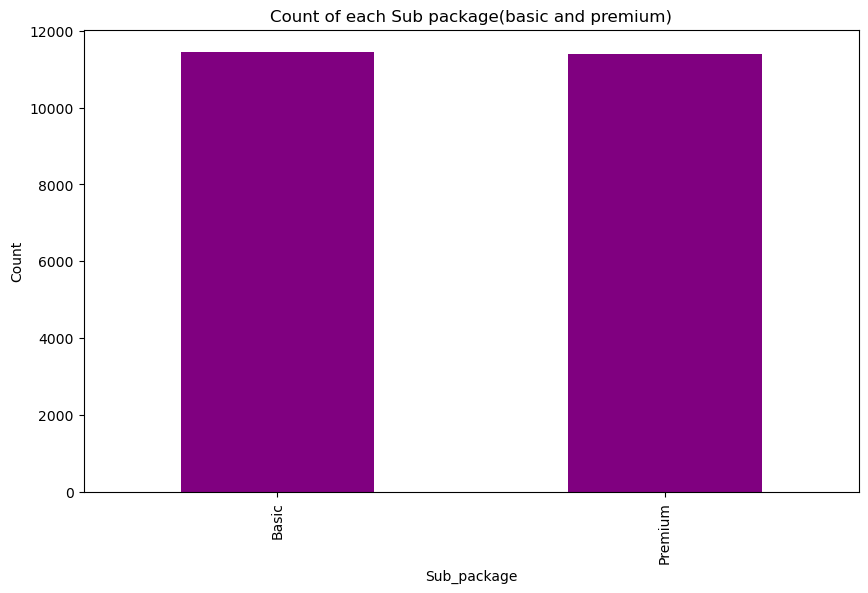

In [12]:
#lets do some basic EDA and see the count and distribution of the basic and premium subscription 
# Counting occurrences of each motive
Sub_package = df1['Subscription_Plan'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
Sub_package.plot(kind='bar',color='purple')
plt.xlabel('Sub_package')
plt.ylabel('Count')
plt.title('Count of each Sub package(basic and premium)')
plt.xticks(rotation=90)
plt.show()

From the chart above we can clearly see that both packages almost has the same number of users.
Let's move on with the analysis and see what we can unfold.

In [14]:
# since we are using a statistical power of 80%, let us now draw our sample from the population
# for each group, we will randomly draw a sample of 10,000 users.

control_sample = df1[df1['Group'] == 'Control'].sample(n=10000, random_state=22)
treatment_sample = df1[df1['Group'] == 'Treatment'].sample(n=10000, random_state=22)

ab_test2 = pd.concat([control_sample, treatment_sample], axis=0)
ab_test2.reset_index(drop=True, inplace=True)

# show the first 10 rows of the smapled data
ab_test2.head(10)

,User_ID,Name,user_name,Subscription_Plan,subscription_upgrade,Avg_Logins_Per_Week,Gender,Time_Spent_Per_Day,Sign_Up_Year,first_time_customer,Week_since_last_sign_in,Group
0,f97c2caa-0b6f-421b-a2db-4080f58e882e,Heather Wright,jessica12975,Premium,True,24,Female,1312,2015,False,2,Control
1,64b34891-66ab-4cbe-867d-e8f707bc1313,Bobby Kelly,aellis826,Premium,False,18,Male,725,2010,False,1,Control
2,ab5cd8ea-6b22-4efc-a2b5-fa44dd918279,Spencer Clark,hward846,Basic,False,1,Male,1311,2009,False,3,Control
3,cf0c5023-6551-48d1-9f66-33f924656196,Dr. Jared Perez MD,lmartin551,Premium,True,60,Female,1256,2016,False,4,Control
4,697de0c1-61b7-4909-abb2-8d81379e84cc,Kristen Snyder,greenchristopher413,Basic,False,60,Female,447,2009,False,0,Control
5,d94f9c4c-716f-4bc9-ab0d-579dec1ff4b5,Brenda Riddle,carneygregory350,Basic,False,79,Male,134,2005,False,2,Control
6,206ed7b9-38fa-42c8-9c68-30ece7fbdb80,Patricia Garcia,brooksandrew396,Basic,False,18,Male,950,2015,False,2,Control
7,6a824d15-de3d-4621-9d43-b3967be19052,Nicole Vazquez,ecruz964,Basic,False,32,Male,574,2023,False,4,Control
8,f7fa4013-c419-4878-8e58-8b099ad24373,Joseph Ballard,kjimenez317,Premium,False,62,Female,404,2013,False,4,Control
9,94e4c0fa-8ba6-4d90-9920-0921206e5b52,Curtis Allison,bjohnson948,Premium,True,94,Male,498,2023,False,1,Control


In [16]:
# Check for duplicate entries using the user_id column.....we have already done this process in SQL but to avaoid duplicate,
# we have to check again
duplicate_user_ids = ab_test2[ab_test2.duplicated('User_ID', keep=False)]

# Display the duplicate entries
print(duplicate_user_ids)

Empty DataFrame
Columns: [User_ID, Name, user_name, Subscription_Plan, subscription_upgrade, Avg_Logins_Per_Week, Gender, Time_Spent_Per_Day, Sign_Up_Year, first_time_customer,  Week_since_last_sign_in, Group]
Index: []


No duplicate entries found, so we move on with the analysis

In [18]:
# Now let us call only the columns we need for this analysis 
ab_test2 = ab_test2[['Subscription_Plan', 'subscription_upgrade', 'Group']]

# Also lets Convert 'subscription_upgrade' to binary code (0 for False, 1 for True)
ab_test2['subscription_upgrade'] = ab_test2['subscription_upgrade'].astype(int)

#print the first 10 rows
ab_test2.head(10)

,Subscription_Plan,subscription_upgrade,Group
0,Premium,1,Control
1,Premium,0,Control
2,Basic,0,Control
3,Premium,1,Control
4,Basic,0,Control
5,Basic,0,Control
6,Basic,0,Control
7,Basic,0,Control
8,Premium,0,Control
9,Premium,1,Control


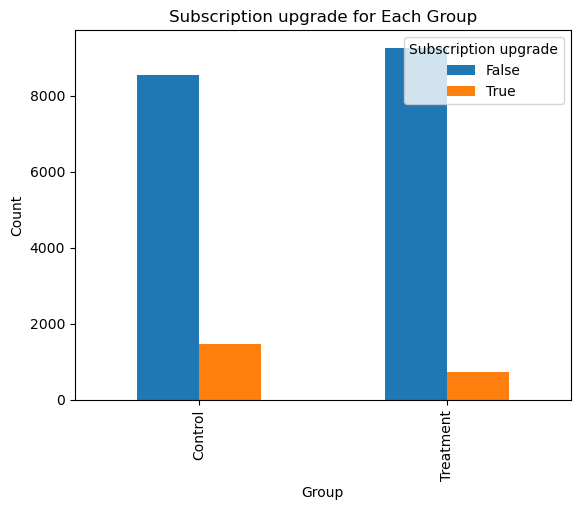

In [22]:
# lets visualize how each group performed in tearms of subscription upgrade 
# Group the data by 'Group' and 'Subscription_upgrade' and calculate the counts
upgrade_counts = ab_test2.groupby(['Group', 'subscription_upgrade']).size().unstack()

# Plot the bar chart
upgrade_counts.plot(kind='bar')

# Customize the chart labels and title
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Subscription upgrade for Each Group')
plt.legend(title='Subscription upgrade', loc='upper right', labels=['False', 'True'])

# Show the plot
plt.show()


 From the chart, the treatment group performed lower than the control group. we will keep on with the analysis and see what out test will say.

In [32]:
# Calculate the subscription renewal rate for each group
renewal_rate = ab_test2.groupby('Group')['subscription_upgrade'].sum() / df.groupby('Group')['subscription_upgrade'].count()

# Print the subscription renewal rate for each group
print("Subscription Renewal Rate for Each Group:")
print(renewal_rate)

Subscription Renewal Rate for Each Group:
Group
Control      0.005844
Treatment    0.002964
Name: subscription_upgrade, dtype: float64


Judging by the stats above, it does look like our two groups performed very differently, with the control group performing better than the treatment group, approx 0.5% vs 0.2% subscription renewal rate.

In [34]:
# Calculate the lift
control_rate = 0.005844
treatment_rate = 0.002964

lift = (treatment_rate - control_rate) / control_rate

print("Lift:", lift)

Lift: -0.49281314168377827


A negative lift of -49.29% indicates that the treatment group (offering a 7-day free trial) performs approximately 49.29% worse than the control group (not offering any free trial). In other words, the subscription renewal rate in the treatment group is significantly lower than the subscription renewal rate in the control group.

# Testing the hypothesis

Null Hypothesis(H0): Offering a 7-day free trial of the premium subscription plan will lead to a higher subscription rate compared to not offering any free trial.


Alternative Hypothesis(H1): Offering a 7-day free trial of the premium subscription plan will not lead to a higher subscription rate compared to not offering any free trial.

In [30]:
# import statsmodel since i failled to import it ealier
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Convert 'subscription_upgrade' to binary
ab_test2[' subscription_upgrade'] = ab_test2['subscription_upgrade'].astype(int)

# Perform the proportions z-test between the control and treatment groups
c_results = ab_test2.loc[ab_test2['Group'] == 'Control', ' subscription_upgrade']
t_results = ab_test2.loc[ab_test2['Group'] == 'Treatment', ' subscription_upgrade']

test_stat, pvalue = proportions_ztest([c_results.sum(), t_results.sum()],
                                      nobs=[len(c_results), len(t_results)])

print(f'Test Stat: {test_stat:.4f}')
print(f'p-value: {pvalue:.4f}')

Test Stat: 16.2650
p-value: 0.0000


Since the p-value is 0.0000 (or very close to zero), it means that the probability of obtaining the observed test statistic (16.2650) by random chance, assuming the null hypothesis is true, is essentially negligible. This suggests strong evidence against the null hypothesis.

# Conclusion:

Since the p-value (0.0000) is less than the significance level (alpha = 0.05) we reject the null hypothesis and conclude that offering a 7-day free trial of the premium subscription plan does not lead to a higher subscription renewal rate compared to not offering any free trial. The results suggest that there is a significant difference in subscription renewal rates between the two groups (offering a free trial vs. not offering a free trial), and this difference is in favor of not offering any free trial.

# Recommendation

In light of these findings, the following recommendations where made:

1.	To optimize the overall quality of the application and elevate user satisfaction, it is imperative to diligently address existing performance issues, such as eliminating delays in loading time and minimizing instances of app crashes. Enhancing the app's smooth functionality will undoubtedly elevate the overall user experience, fostering an increased rate of subscriptions and customer retention.

2.	Significantly enhancing the premium feature is vital to compelling users to not only purchase plans but also ensure subscription renewal. This can be achieved by meticulously tailoring content to meet individual user preferences, while also optimizing the interface for intuitive usability. Moreover, granting premium users more expanded access to exclusive content will further incentivize them to invest in and maintain premium subscriptions.

3.	Implementing a compulsory survey during the cancellation process is of utmost importance. This strategic measure will serve to gather valuable insights into the reasons behind users' decision to cancel their plans, enabling us to discern patterns and identify areas of improvement. Armed with this essential feedback, we can proactively implement measures to mitigate cancellations and enhance overall user satisfaction.

By earnestly addressing these critical areas for improvement, we are poised to not only bolster our application's performance and premium offerings but also ensure a more profound understanding of our users' needs, consequently fortifying our position in the market and solidifying long-term customer loyalty.

